In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


In [2]:
car_data = pd.read_csv("car data.csv")

In [3]:
df = car_data.copy()
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
df.isnull().sum().sum()

0

In [6]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [8]:
df_description = []
for i in df.columns:
   
    df_description.append([i,df[i].dtype,df[i].nunique(),df[i].unique()])
df_columns = pd.DataFrame(df_description,columns = ['Column','dtype','nunique','unique'])
df_columns

,Column,dtype,nunique,unique
0,Car_Name,object,98,"[ritz, sx4, ciaz, wagon r, swift, vitara brezz..."
1,Year,int64,16,"[2014, 2013, 2017, 2011, 2018, 2015, 2016, 200..."
2,Selling_Price,float64,156,"[3.35, 4.75, 7.25, 2.85, 4.6, 9.25, 6.75, 6.5,..."
3,Present_Price,float64,147,"[5.59, 9.54, 9.85, 4.15, 6.87, 9.83, 8.12, 8.6..."
4,Kms_Driven,int64,206,"[27000, 43000, 6900, 5200, 42450, 2071, 18796,..."
5,Fuel_Type,object,3,"[Petrol, Diesel, CNG]"
6,Seller_Type,object,2,"[Dealer, Individual]"
7,Transmission,object,2,"[Manual, Automatic]"
8,Owner,int64,3,"[0, 1, 3]"


In [9]:
# let's drop car_name as it is not going to help in predicting the price
df.drop(columns = 'Car_Name',inplace = True)
df.head()


,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [11]:
from datetime import datetime

In [16]:
# current_date = datetime.now()
a = datetime.now().year
a

2023

In [17]:
# let's add one new feature to know how many kilom eters car driven for 
# current_date = datetime.now()
df['current_year'] = datetime.now().year
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,current_year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2023
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2023
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2023
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2023
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2023


In [18]:
df['num_years'] = df['current_year'] - df['Year']
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,current_year,num_years
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2023,9
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2023,10
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2023,6
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2023,12
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2023,9


In [20]:
# let's drop year feature 
df.drop(columns = ['Year'],inplace = True)
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,current_year,num_years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,2023,9
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,2023,10
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,2023,6
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,2023,12
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,2023,9


In [21]:
#  encoding the categorical features
df1 = pd.get_dummies(df,drop_first = True)
df1.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,current_year,num_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,2023,9,0,1,0,1
1,4.75,9.54,43000,0,2023,10,1,0,0,1
2,7.25,9.85,6900,0,2023,6,0,1,0,1
3,2.85,4.15,5200,0,2023,12,0,1,0,1
4,4.60,6.87,42450,0,2023,9,1,0,0,1


In [22]:
#  let's drop current_year feature also
df1.drop(columns = ['current_year'],inplace = True)
df1.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,num_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,9,0,1,0,1
1,4.75,9.54,43000,0,10,1,0,0,1
2,7.25,9.85,6900,0,6,0,1,0,1
3,2.85,4.15,5200,0,12,0,1,0,1
4,4.60,6.87,42450,0,9,1,0,0,1


In [23]:
# let's fine correlation between the features
df1.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,num_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
num_years,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


<AxesSubplot:>

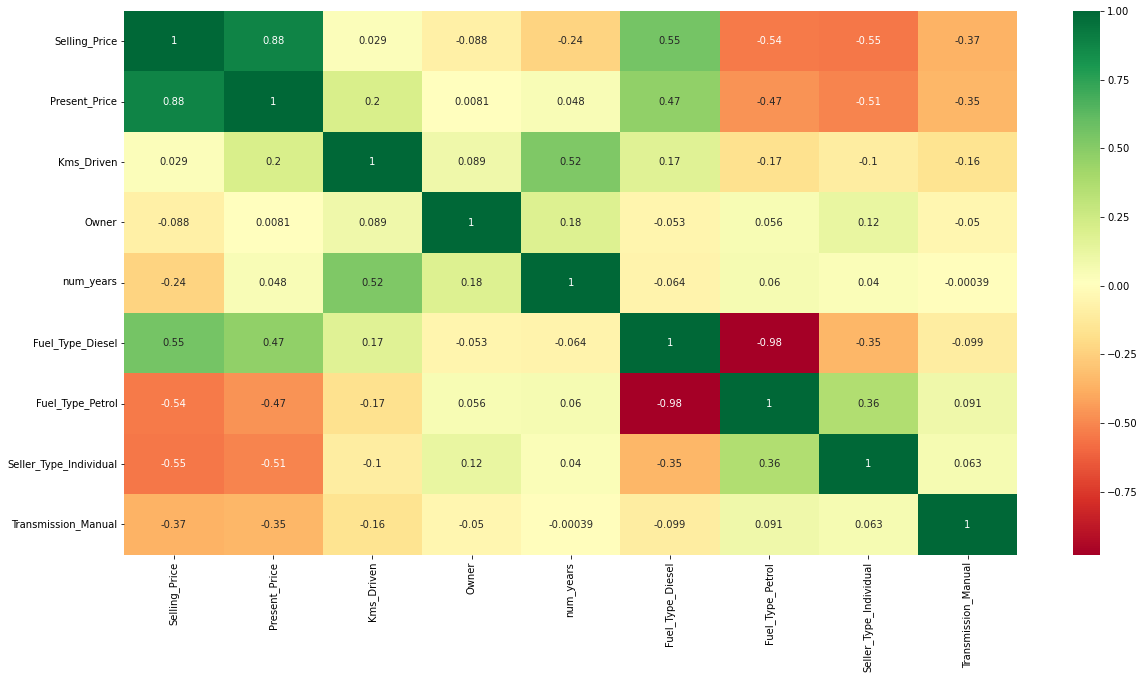

In [25]:
plt.figure(figsize = (20,10))
sns.heatmap(df1.corr(),annot = True,cmap = 'RdYlGn')
# selling price and present price are highly positively correlated
# fuel type diesel and fuel type petrol highly negatively correlated

In [27]:
# let's seperate dependent and independent variables
x = df1.iloc[:,1:]
y = df1.iloc[:,0]

In [28]:
x.head()

,Present_Price,Kms_Driven,Owner,num_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,9,0,1,0,1
1,9.54,43000,0,10,1,0,0,1
2,9.85,6900,0,6,0,1,0,1
3,4.15,5200,0,12,0,1,0,1
4,6.87,42450,0,9,1,0,0,1


In [29]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [31]:
## let's find Feeature Importance 
from sklearn.ensemble import ExtraTreesRegressor
model_et  = ExtraTreesRegressor()
model_et.fit(x,y)

ExtraTreesRegressor()

In [32]:
model_et.feature_importances_

array([4.22892460e-01, 4.20811195e-02, 3.36580404e-04, 7.53225339e-02,
       2.08100348e-01, 1.19403291e-02, 1.21662933e-01, 1.17663697e-01])

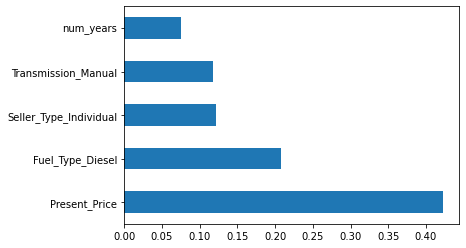

In [35]:
# plot the graph for feature importances of features
feature_imp = pd.Series(model_et.feature_importances_, index= x.columns)
feature_imp.nlargest(5,keep='first').plot(kind = 'barh')
plt.show()

In [36]:
# Let's split the data into training for the model building and testing for evaluation
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)


In [37]:
# let's scale the data using standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [38]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [39]:
x_train1 = pd.DataFrame(x_train_scaled,columns= x.columns)
x_test1 = pd.DataFrame(x_test_scaled,columns= x.columns)

In [41]:
# model buiding
from sklearn.ensemble import RandomForestRegressor 

In [50]:
rf = RandomForestRegressor()

In [46]:
#  Hyper parameter tuning
n_estimators = [int(x) for x in np.linspace(start=100,stop = 1200,num=12)]
max_features = ['sqrt','auto','log2']
max_depth = [int(x) for x in np.linspace(5,30,num=6)]
max_sample_split =[2,5,10,15,100]
max_sample_leaf = [1,2,5,10]

In [57]:
param_grid = {'n_estimators':n_estimators,
              'max_features':max_features,
              'max_depth':max_depth,
              'min_samples_split':max_sample_split,
              'min_samples_leaf':max_sample_leaf}

print(param_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['sqrt', 'auto', 'log2'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [58]:
from sklearn.model_selection import RandomizedSearchCV

In [59]:
random_rf = RandomizedSearchCV(estimator=rf,param_distributions=param_grid,scoring ='neg_mean_squared_error',n_jobs = -1,cv=5)

In [60]:
random_rf.fit(x_train1,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['sqrt', 'auto',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   scoring='neg_mean_squared_error')

In [53]:
rf.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [ ]:
random_rf.best_params_

In [62]:
random_rf.best_score_

-3.407544883791668

In [69]:
# prediction
predictions = random_rf.predict(x_test1)

<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

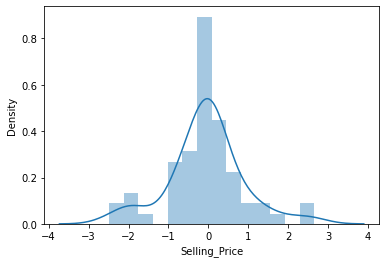

In [70]:
sns.distplot(y_test-predictions)

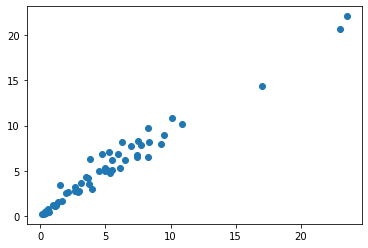

In [71]:
plt.scatter(y_test,predictions)

In [68]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [73]:
print('MAE:', mean_absolute_error(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))

MAE: 0.6277377049180323
MSE: 0.8773120977049186
RMSE: 0.936649399564703


In [74]:
import pickle
# open a file, where you want to store the data
file = open('random_forest_regression_model.pkl','wb')

# dump information to the file

pickle.dump(random_rf,file)
